
# <font color='pink'>Análise de dados de pacientes com câncer de mama</font>

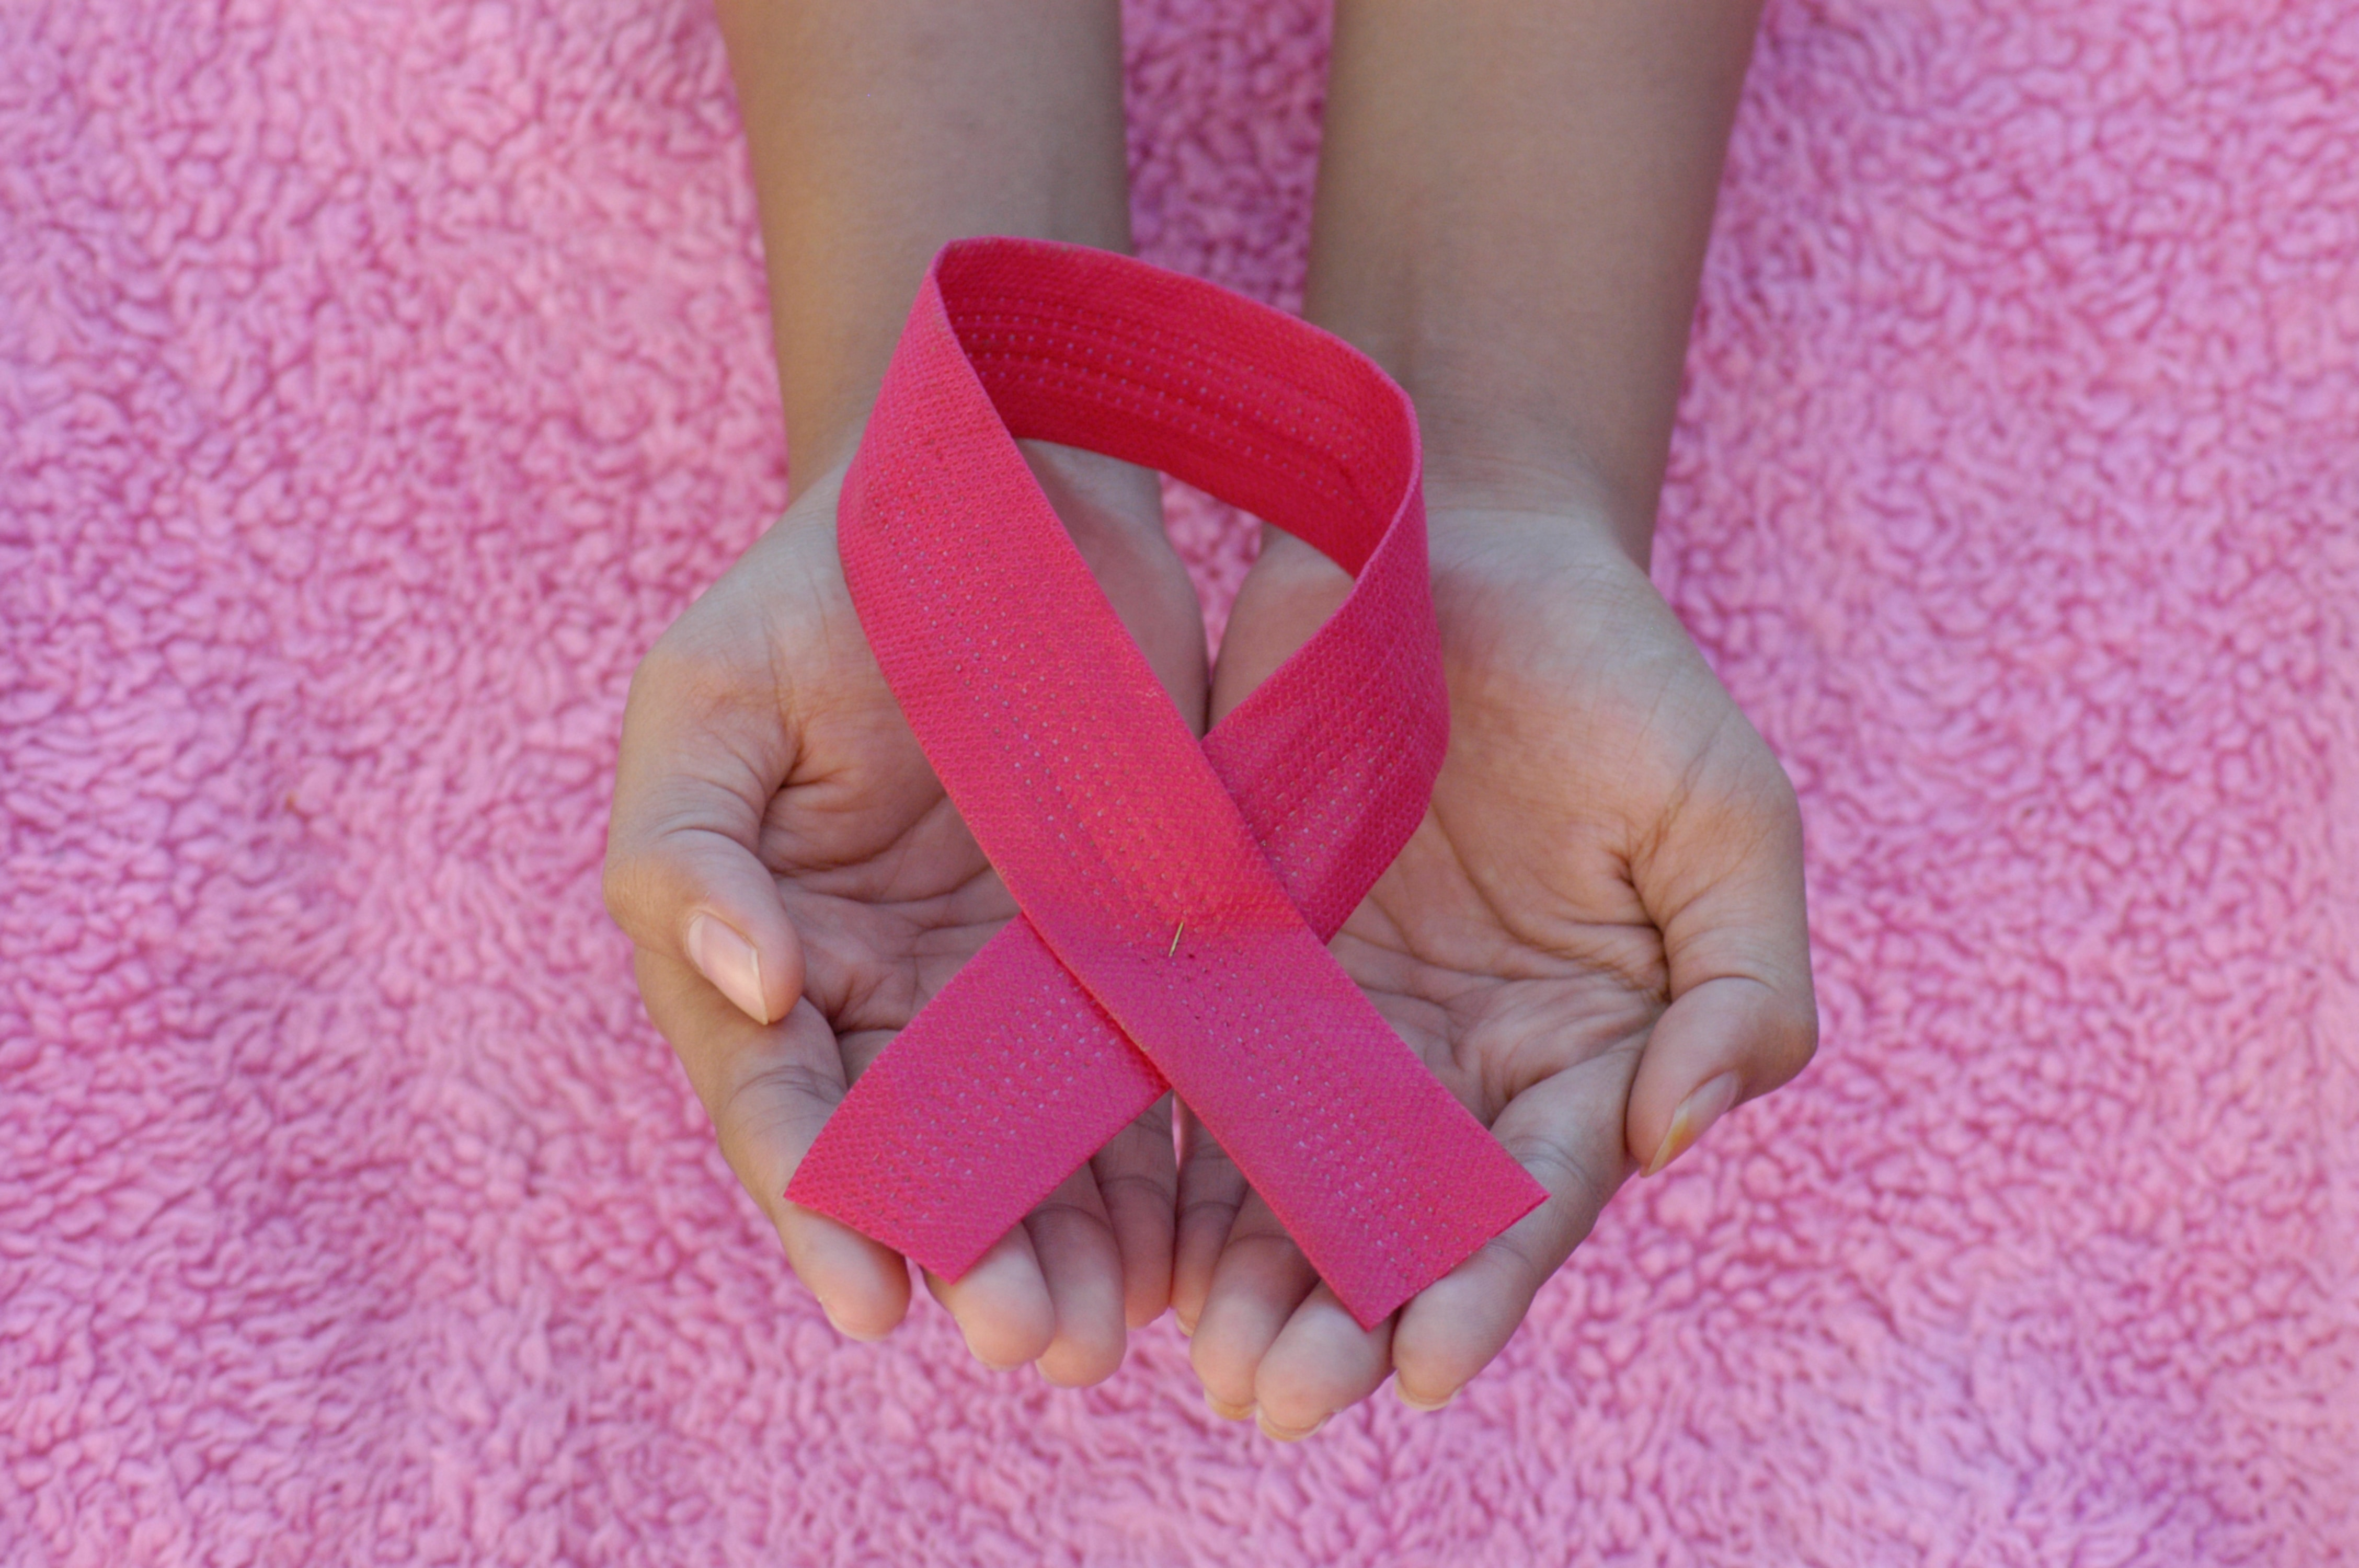

### Definição do Problema e Fonte de Dados

Este projeto possui o intuito de analisar dados extraídos de pacientes com câncer de mama. O trabalho possui por objetivo responder às seguintes perguntas:

* Pergunta 1: Há uma sugestão de relação entre os níveis de expressão de proteínas, a idade e o status do paciente?
* Pergunta 2: Há uma sugestão de relação entre o estágio do câncer e a situação do paciente?
* Pergunta 3: Há uma sugestão de relação entre o tipo de cirurgia e a situação do paciente?
* Pergunta 4: Há uma sugestão de relação entre a idade do paciente e a situação do paciente?

Para isso, os dados passarão pelo processo exploração, limpeza, tratamento, análise exploratória e análise final.

## Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python

from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


In [2]:
# Importando os pacotes

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Versões dos pacotes usados neste jupyter notebook

%reload_ext watermark
%watermark -a "Natasha Stéphany" --iversions

Author: Natasha Stéphany

seaborn   : 0.12.2
matplotlib: 3.7.1
pandas    : 2.0.2
numpy     : 1.22.2



### Carregando os Dados

In [4]:
# Carregando a planilha

dados = pd.read_csv("C:/Users/gusma/Documents/Portfolio/Dados/Projeto1/breast_cancer_dataset.csv")

### Explorando os dados

Vamos começar com uma breve exploração dos dados.

In [5]:
# Verificando a quantidade de linhas e de colunas

dados.shape

(334, 15)

In [6]:
# Visualizando os dados

dados.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [7]:
# Visualizando as informações das variáveis

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

Aqui observamos a presença de valores nulos em duas variáveis (data da última visita, e status do paciente). Essas variáveis irão passar pelo processo de limpeza, até que não restem valores nulos, já que estes podem representar problemas em análises futuras.

### Limpeza e tratamento de valores nulos

In [8]:
# Verificando a quantidade de valores nulos (ausentes) por coluna

dados.isnull().sum()

Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [9]:
# Calculando o percentual de valores nulos por coluna

# Total de valores ausentes
total_ausentes = dados.isnull().sum()

# Porcentagem de valores ausentes
perc_val_ausentes = ( total_ausentes / len(dados) ) * 100
    
# Print 
print (perc_val_ausentes)

Age                   0.000000
Gender                0.000000
Protein1              0.000000
Protein2              0.000000
Protein3              0.000000
Protein4              0.000000
Tumour_Stage          0.000000
Histology             0.000000
ER status             0.000000
PR status             0.000000
HER2 status           0.000000
Surgery_type          0.000000
Date_of_Surgery       0.000000
Date_of_Last_Visit    5.089820
Patient_Status        3.892216
dtype: float64


A variável referente à data da última visita ao paciente possui cerca de 5% de valores ausentes, e a variável de status do paciente possui 3,89%.

O status da paciente é de vital importância para o estudo, visto que esta variável é necessária para responder várias das perguntas realizadas. Portanto, levando-se em consideração que apenas 3,89% dos registros não contém essa informação, não faria sentido mantê-los pois trata-se de uma informação crucial para a análise. Decidiu-se por descartá-los.

Já em relação à variável de data da última visita, verificou-se que não se trata de uma variável relevante para a análise. A data da última visita ao paciente não irá impactar na análise deste projeto. Portanto, decidiu-se por descartar a coluna inteira.

In [10]:
# Antes de dar prosseguimento ao processo de limpeza dos dados, vamos criar uma cópia do dataset original.

dados_original = dados

In [11]:
dados_original.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [12]:
# Agora vamos excluir as linhas com valores ausentes da coluna de status do paciente

dados.dropna(axis = 0, subset = ["Patient_Status"], inplace = True)

In [13]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 321 non-null    int64  
 1   Gender              321 non-null    object 
 2   Protein1            321 non-null    float64
 3   Protein2            321 non-null    float64
 4   Protein3            321 non-null    float64
 5   Protein4            321 non-null    float64
 6   Tumour_Stage        321 non-null    object 
 7   Histology           321 non-null    object 
 8   ER status           321 non-null    object 
 9   PR status           321 non-null    object 
 10  HER2 status         321 non-null    object 
 11  Surgery_type        321 non-null    object 
 12  Date_of_Surgery     321 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 40.1+ KB


Como haviam 13 linhas com valores ausentes na coluna de status do paciente, e estas foram excluídas, agora o dataset possui 321 linhas.

In [14]:
# Agora vamos excluir a coluna de data da última visita.

dados.drop(columns = ["Date_of_Last_Visit"], inplace = True)

In [15]:
dados.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,Alive


In [16]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321 entries, 0 to 333
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              321 non-null    int64  
 1   Gender           321 non-null    object 
 2   Protein1         321 non-null    float64
 3   Protein2         321 non-null    float64
 4   Protein3         321 non-null    float64
 5   Protein4         321 non-null    float64
 6   Tumour_Stage     321 non-null    object 
 7   Histology        321 non-null    object 
 8   ER status        321 non-null    object 
 9   PR status        321 non-null    object 
 10  HER2 status      321 non-null    object 
 11  Surgery_type     321 non-null    object 
 12  Date_of_Surgery  321 non-null    object 
 13  Patient_Status   321 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 37.6+ KB


Pronto, agora nosso dataset não possui valores nulos.

## Análise exploratória

Agora que realizamos a limpeza dos dados, vamos fazer uma análise das variáveis para verificar se algum tipo de alteração pode ser feita para que facilite a etapa de análise de dados (tais como enconding de variáveis, conversão do tipo de variável, etc), e se alguma outra variável poderá ser descartada.

In [17]:
dados.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,Alive


In [18]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321 entries, 0 to 333
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              321 non-null    int64  
 1   Gender           321 non-null    object 
 2   Protein1         321 non-null    float64
 3   Protein2         321 non-null    float64
 4   Protein3         321 non-null    float64
 5   Protein4         321 non-null    float64
 6   Tumour_Stage     321 non-null    object 
 7   Histology        321 non-null    object 
 8   ER status        321 non-null    object 
 9   PR status        321 non-null    object 
 10  HER2 status      321 non-null    object 
 11  Surgery_type     321 non-null    object 
 12  Date_of_Surgery  321 non-null    object 
 13  Patient_Status   321 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 37.6+ KB


Vamos começar a análise olhando para as variáveis do tipo "object".

In [19]:
dados.describe(include = object)

,Gender,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Patient_Status
count,321,321,321,321,321,321,321,321,321
unique,2,3,3,1,1,2,4,178,2
top,FEMALE,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-Dec-18,Alive
freq,317,182,226,321,321,292,98,5,255


#### Nota-se que duas variáveis possuem valor único no dataset, "ER status" e "PR status".

In [20]:
dados["ER status"].unique()

array(['Positive'], dtype=object)

In [21]:
dados["PR status"].unique()

array(['Positive'], dtype=object)

Todos os registros destas duas variáveis possuem o valor único de positivo. Ou seja, todos os pacientes obtiveram exatamente o mesmo resultado nos dois exames. Ora, como não há diferença no resultado deste exame, essas variáveis não irão impactar na análise dos nossos resultados, e portanto podem ser excluídas do dataset. Faremos isso à seguir.

In [22]:
# Excluindo as colunas "ER status" e "PR status" do dataset.

dados.drop(columns = ["ER status", "PR status"], inplace = True)

In [23]:
dados.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Date_of_Surgery,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Negative,Other,20-May-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Negative,Other,26-Apr-18,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Negative,Lumpectomy,24-Aug-18,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Negative,Other,16-Nov-18,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Lumpectomy,12-Dec-18,Alive


As colunas foram removidas do dataset.

In [24]:
# Continuando a análise

dados.describe(include = object)

,Gender,Tumour_Stage,Histology,HER2 status,Surgery_type,Date_of_Surgery,Patient_Status
count,321,321,321,321,321,321,321
unique,2,3,3,2,4,178,2
top,FEMALE,II,Infiltrating Ductal Carcinoma,Negative,Other,06-Dec-18,Alive
freq,317,182,226,292,98,5,255


Por hora não faremos mais alterações nestas variáveis. Agora vamos analisar as variáveis numéricas.

In [25]:
dados.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,321.000000,321.000000,321.000000,321.000000,321.000000
mean,58.875389,-0.026479,0.954563,-0.093279,0.008813
std,12.929982,0.546689,0.909635,0.587981,0.622491
min,29.000000,-2.144600,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.361650,0.368840,-0.531360,-0.378070
50%,58.000000,0.005649,1.000300,-0.177200,0.040511
75%,68.000000,0.336530,1.633200,0.275630,0.428860
max,90.000000,1.593600,3.402200,2.193400,1.629900


Vamos explorar graficamente para ter uma melhor visão da distribuição dessas variáveis.

Text(0.5, 1.0, 'Histograma de idade')

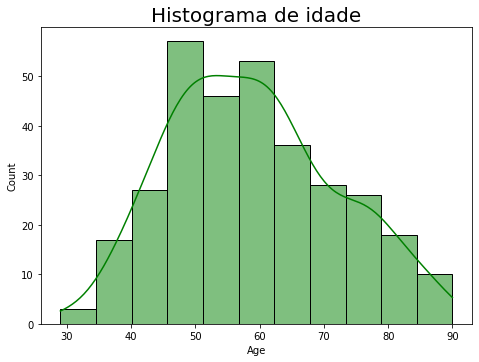

In [26]:
# Vamos começar pela variável idade. Vamos fazer um plot de seu histograma:

# Figura
plt.figure(figsize = (17,12))

# Subplots com histogramas
plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(dados['Age'], kde = True, color = "green")
plt.title('Histograma de idade', fontsize = 20)

Aparentemente não há indícios de presença de valores fora da realidade nesta variável.

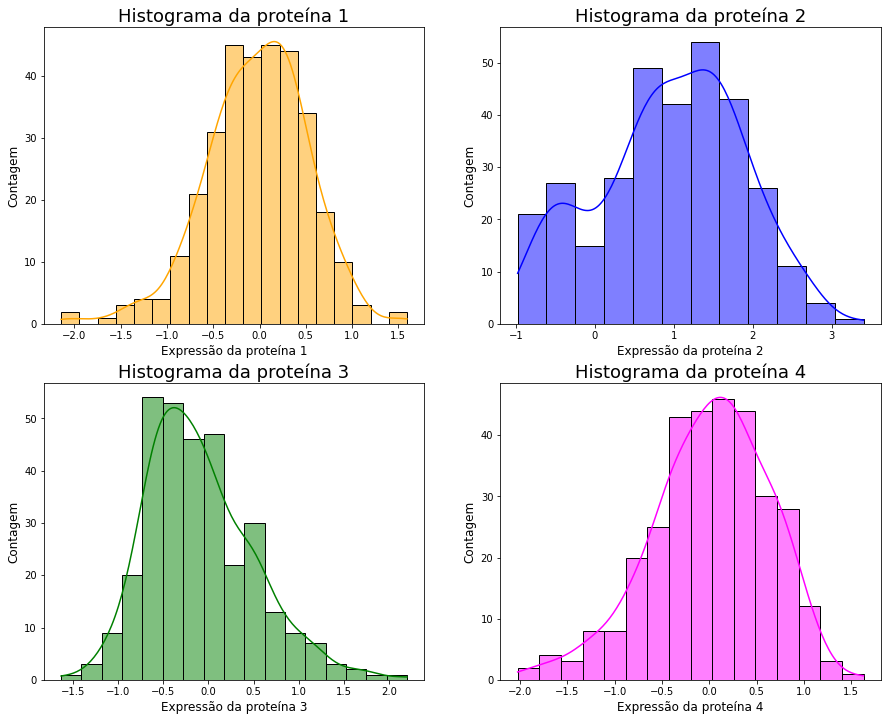

In [27]:
# Agora vamos observar a distribuição das variáveis de expressão de proteínas 1, 2, 3 e 4 através de diferentes histogramas: 

# Figura
plt.figure(figsize = (15,12))

# Subplots com histogramas
plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(dados['Protein1'], kde = True, color = "orange")
plt.title('Histograma da proteína 1', fontsize = 18)
plt.xlabel("Expressão da proteína 1", fontsize = 12, color = 'black')
plt.ylabel("Contagem", fontsize = 12, color = 'black')

plt.subplot(222)
sns.histplot(dados['Protein2'], kde = True, color = "blue")
plt.title('Histograma da proteína 2', fontsize = 18)
plt.xlabel("Expressão da proteína 2", fontsize = 12, color = 'black')
plt.ylabel("Contagem", fontsize = 12, color = 'black')

plt.subplot(223)
sns.histplot(dados['Protein3'],kde = True, color = "green")
plt.title('Histograma da proteína 3', fontsize = 18)
plt.xlabel("Expressão da proteína 3", fontsize = 12, color = 'black')
plt.ylabel("Contagem", fontsize = 12, color = 'black')

plt.subplot(224)
sns.histplot(dados['Protein4'], kde = True, color = "magenta")
plt.title('Histograma da proteína 4', fontsize = 18)
plt.xlabel("Expressão da proteína 4", fontsize = 12, color = 'black')
plt.ylabel("Contagem", fontsize = 12, color = 'black')
plt.show()

Aparentemente não há presença de anomalias nessas variáveis. Vamos prosseguir para a análise de dados final.

# Análise dos dados

Esta seção é destinada a responder as perguntas feitas no início do projeto.

#### Pergunta 1: Há uma sugestão de relação entre os níveis de expressão de proteínas, a idade e o status do paciente?

Text(33.20531249999999, 0.5, 'Expressão proteína 1')

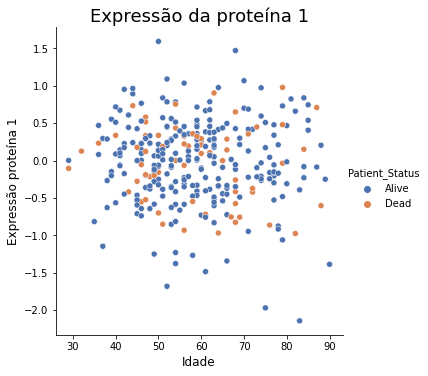

In [28]:
# Vamos colocar gráficos de dispersão para cada uma das proteínas, para observar seu comportamento em relação à idade e ao status
# do paciente. Começando pela proteína 1:

sns.relplot(data = dados, x = "Age", y = "Protein1", hue = "Patient_Status", palette = "deep", kind = "scatter")

plt.title("Expressão da proteína 1", fontsize = 18)

plt.xlabel("Idade", fontsize = 12, color = 'black')

plt.ylabel("Expressão proteína 1", fontsize = 12, color = 'black')

Text(31.079791666666672, 0.5, 'Expressão proteína 2')

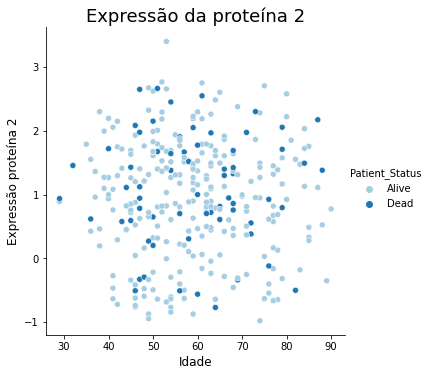

In [29]:
# Gráficos de dispersão da proteína 2:

sns.relplot(data = dados, x = "Age", y = "Protein2", hue = "Patient_Status", palette = "Paired", kind = "scatter")

plt.title("Expressão da proteína 2", fontsize = 18)

plt.xlabel("Idade", fontsize = 12, color = 'black')

plt.ylabel("Expressão proteína 2", fontsize = 12, color = 'black')

Text(33.20531249999999, 0.5, 'Expressão proteína 3')

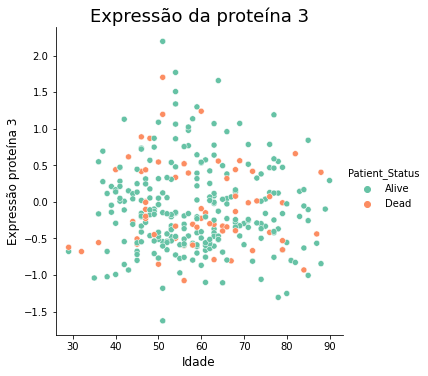

In [30]:
# Gráficos de dispersão da proteína 3:

sns.relplot(data = dados, x = "Age", y = "Protein3", hue = "Patient_Status", palette = "Set2", kind = "scatter")

plt.title("Expressão da proteína 3", fontsize = 18)

plt.xlabel("Idade", fontsize = 12, color = 'black')

plt.ylabel("Expressão proteína 3", fontsize = 12, color = 'black')

Text(33.20531249999999, 0.5, 'Expressão proteína 4')

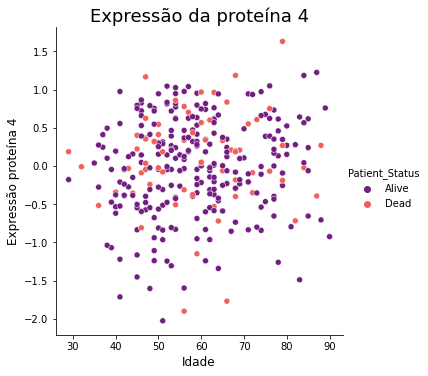

In [31]:
# Gráficos de dispersão da proteína 4:

sns.relplot(data = dados, x = "Age", y = "Protein4", hue = "Patient_Status", palette = "magma", kind = "scatter")

plt.title("Expressão da proteína 4", fontsize = 18)

plt.xlabel("Idade", fontsize = 12, color = 'black')

plt.ylabel("Expressão proteína 4", fontsize = 12, color = 'black')

Analisando-se os quatro gráficos separadamente, não se observa nenhum padrão entre o nível de expressão das proteínas de acordo com a idade ou em relação ao status do paciente. Aparentemente os pontos encontram-se dispersos de maneira aleatória.

#### Pergunta 2: Há uma sugestão de relação entre o estágio do câncer e a situação do paciente?


Text(0, 0.5, 'Total de pacientes')

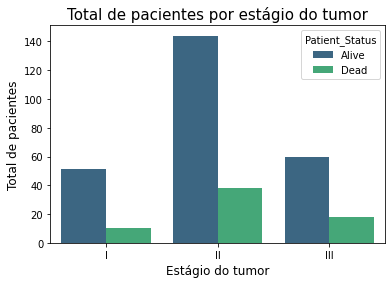

In [32]:
# Para responder essa pergunta utilizaremos dois gráficos de barras. O primeiro mostra a divisão entre a quantidade de pacientes
# vivos e mortos de acordo com o nível do tumor.

ax = sns.countplot(data = dados, x = "Tumour_Stage", hue = "Patient_Status", order = ["I", "II", "III"], palette = "viridis")

ax.set_title("Total de pacientes por estágio do tumor", fontsize = 15)

ax.set_xlabel("Estágio do tumor",fontsize = 12)

ax.set_ylabel("Total de pacientes",fontsize = 12)

A maior parte dos pacientes que sobreviveram possuíam estágio de tumor nível 2, seguido pelo nível 3 e por último nível 1.
Agora vamos calcular em termos percentuais.

In [33]:
# Para gerar o gráfico em termos percentuais precisamos primeiro calcular o percentual de cada coluna e colocar em um novo 
# dataset:

percentual_estagio_tumor = pd.crosstab(dados.Tumour_Stage , dados.Patient_Status, margins = True, normalize = 'index') * 100
percentual_estagio_tumor

Patient_Status,Alive,Dead
Tumour_Stage,,
I,83.606557,16.393443
II,79.120879,20.879121
III,76.923077,23.076923
All,79.439252,20.560748


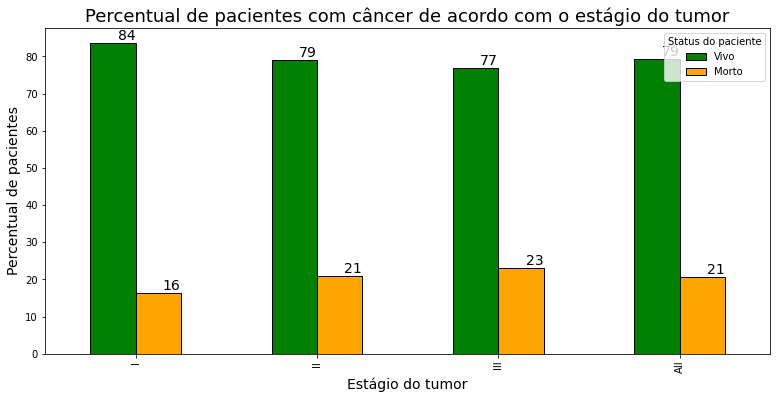

In [34]:
# Criando o gráfico com o percentual de pacientes com tumor em diferentes estágios:

fig = percentual_estagio_tumor.plot(kind = 'bar', figsize = (13, 6), width = 0.5, edgecolor = 'black', color = ['g', 'orange'])

plt.legend(title = 'Status do paciente', labels = ('Vivo', 'Morto'))

plt.xlabel("Estágio do tumor", fontsize = 14, color = 'black')

plt.ylabel("Percentual de pacientes", fontsize = 14, color = 'black')

plt.title("Percentual de pacientes com câncer de acordo com o estágio do tumor", fontsize = 18)

# Colocando os rótulos nos dados
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.2, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')


Uma análise em termos percentuais nos mostra que a maior taxa de pessoas que sobreviveram possuíam tumor nível 1 (84%). Para este dataset, o percentual de pacientes vivos diminuiu conforme o nível do tumor aumentou. 

#### Pergunta 3: Há uma sugestão de relação entre o tipo de cirurgia e a situação do paciente?

Vamos responder essa pergunta de maneira análoga à forma com que respondemos a pergunta número 2, através de gráficos de barras.

Text(0, 0.5, '')

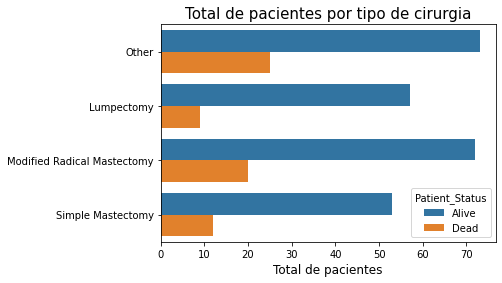

In [35]:
ax = sns.countplot(data = dados, y = "Surgery_type", hue = "Patient_Status")

ax.set_title("Total de pacientes por tipo de cirurgia", fontsize = 15)

ax.set_xlabel("Total de pacientes",fontsize = 12)

ax.set_ylabel("",fontsize = 15)

A maior parte dos pacientes que sobreviveram realizaram outros tipos de cirurgia não relatado nos dados. Talvez fosse interessante em uma análise futura aumentar a quantidade de opções de cirurgia disponíveis no momento da coleta dos dados.
Dentre as opções disponíveis no dataset, a cirurgia do tipo "Mastectomia Radical Modificada" foi a que mais pacientes sobreviveram.
Mais uma vez, vamos fazer a análise com os dados percentuais.

In [36]:
# Calculando o percentual e colocando em um novo dataset:

percentual_tipo_cirurgia = pd.crosstab(dados.Surgery_type , dados.Patient_Status, margins = True, normalize = 'index') * 100
percentual_tipo_cirurgia

Patient_Status,Alive,Dead
Surgery_type,,
Lumpectomy,86.363636,13.636364
Modified Radical Mastectomy,78.260870,21.739130
Other,74.489796,25.510204
Simple Mastectomy,81.538462,18.461538
All,79.439252,20.560748


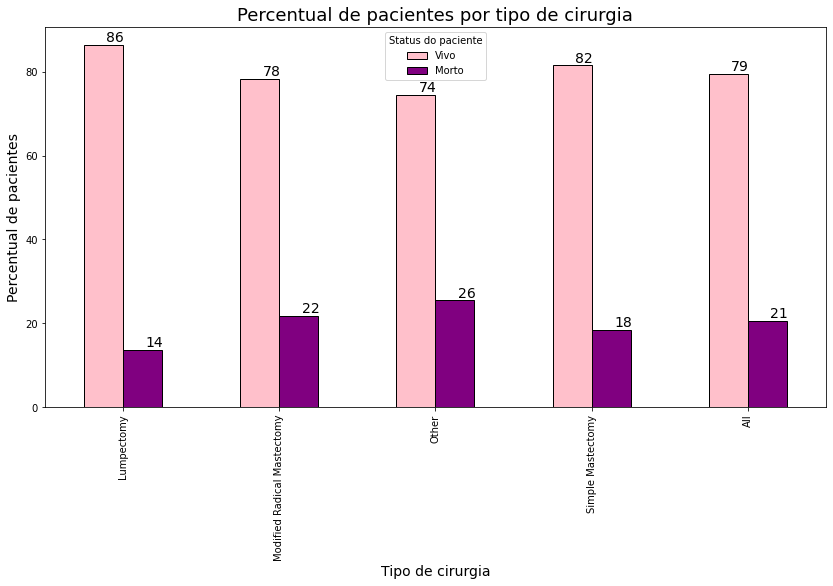

In [37]:
# Criando o gráfico com o percentual de pacientes com tumor em diferentes estágios:

fig = percentual_tipo_cirurgia.plot(kind = 'bar', figsize = (14, 7), width = 0.5, edgecolor = 'black', color = ["pink", "purple"])

plt.legend(title = 'Status do paciente', labels = ('Vivo', 'Morto'))

plt.xlabel("Tipo de cirurgia", fontsize = 14, color = 'black')

plt.ylabel("Percentual de pacientes", fontsize = 14, color = 'black')

plt.title("Percentual de pacientes por tipo de cirurgia", fontsize = 18)

# Coloca os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.2, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')

Aqui, observamos que o maior percentual de pacientes que sobreviveram realizaram a cirurgia mastectomia. Todavia, não há uma grande diferença percentual em relação aos demais tipos de cirurgia. 

#### Pergunta 4: Há uma sugestão de relação entre a idade do paciente e a situação do paciente?

Para responder essa pergunta, primeiro será necessário fazer a recategorização da variável idade em categorias de faixa etária, para que os dados possam ser visualizados.


In [38]:
# Observando a distribuição dos valores da variável "idade"

dados.groupby('Age').size()

Age
29     2
32     1
35     1
36     3
37     2
38     3
39     3
40     5
41     6
42     5
43     3
44     4
45     9
46    11
47     9
48     7
49     9
50    12
51     9
52     8
53    10
54    13
55     3
56    12
57     6
58     6
59    15
60     8
61     8
62    10
63    14
64     6
65     6
66     8
67     2
68    10
69     4
70     2
71     6
72     3
73     3
74     6
75     3
76     5
77     8
78     4
79     6
80     3
81     1
82     2
83     2
84     4
85     4
87     2
88     2
89     1
90     1
dtype: int64

In [39]:
# Como existe apenas um registro abaixo de 30 anos, vamos colocá-lo na mesma faixa etária das pessoas que possuem idades entre
# 30 e 40 anos.

dados['Age'] = dados['Age'].replace(range(29,41), "29-40")
dados['Age'] = dados['Age'].replace(range(41,51), "40-50")
dados['Age'] = dados['Age'].replace(range(51,61), "50-60")
dados['Age'] = dados['Age'].replace(range(61,71), "60-70")
dados['Age'] = dados['Age'].replace(range(71,81), "70-80")
dados['Age'] = dados['Age'].replace(range(81,91), "80-90")

In [40]:
# Conferindo a recategorização

dados.groupby('Age').size()

Age
29-40    20
40-50    75
50-60    90
60-70    70
70-80    47
80-90    19
dtype: int64

Text(0, 0.5, 'Total de pacientes')

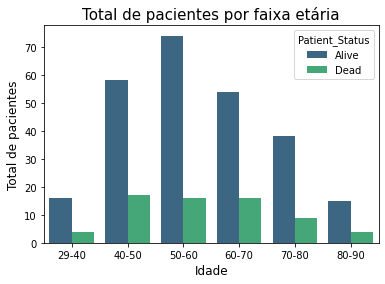

In [41]:
# Criando o gráfico

ax = sns.countplot(data = dados, x = "Age", hue = "Patient_Status", order = ["29-40", "40-50", "50-60", "60-70", "70-80", "80-90"], 
                   palette = "viridis")

ax.set_title("Total de pacientes por faixa etária", fontsize = 15)

ax.set_xlabel("Idade",fontsize = 12)

ax.set_ylabel("Total de pacientes",fontsize = 12)

In [42]:
# Calculando o percentual e colocando em um novo dataset:

percentual_idade_paciente = pd.crosstab(dados.Age , dados.Patient_Status, margins = True, normalize = 'index') * 100
percentual_idade_paciente

Patient_Status,Alive,Dead
Age,,
29-40,80.000000,20.000000
40-50,77.333333,22.666667
50-60,82.222222,17.777778
60-70,77.142857,22.857143
70-80,80.851064,19.148936
80-90,78.947368,21.052632
All,79.439252,20.560748


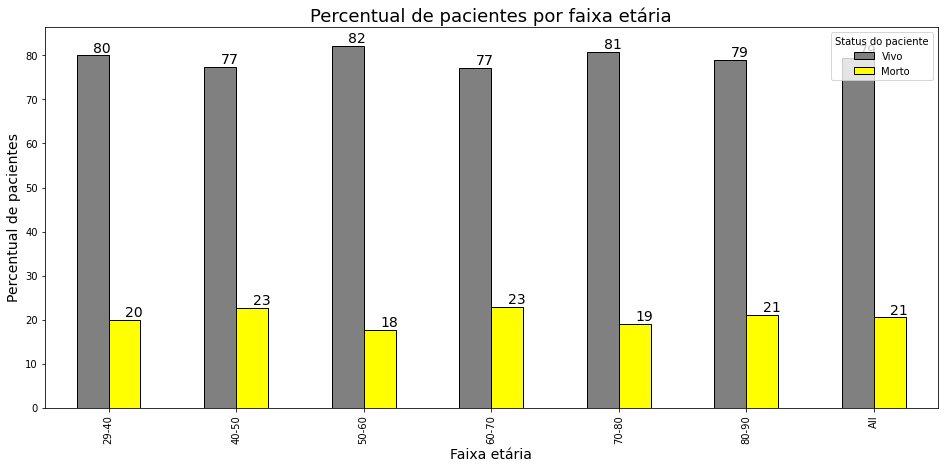

In [43]:
# Criando o gráfico com o percentual de pacientes com tumor em diferentes estágios:

# Cria o gráfico
# Observe que chamamos o plot a partir do dataframe usando nesse caso o Matplotlib
fig = percentual_idade_paciente.plot(kind = 'bar', figsize = (16, 7), width = 0.5, edgecolor = 'black', color = ['gray', 'yellow'])

plt.legend(title = 'Status do paciente', labels = ('Vivo', 'Morto'))

plt.xlabel("Faixa etária", fontsize = 14, color = 'black')

plt.ylabel("Percentual de pacientes", fontsize = 14, color = 'black')

plt.title("Percentual de pacientes por faixa etária", fontsize = 18)

# Coloca os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.2, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')

O gráfico acima não sugere uma relação direta entre idade do paciente e status do paciente, visto que o percentual de pacientes oscila ao longo das faixas etárias observadas. 